<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20255/Assignment%204/CMPE_255_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255 Clustering Assignment : K-Means from Scratch

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
wine_data=load_wine()
data = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
X= data.values
y= wine_data.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
X.shape

(178, 13)

## Data Transforming

In [4]:
from sklearn.preprocessing import normalize

data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


In [5]:
pca = PCA(2)
  
#Transform the data
X_tranformed = pca.fit_transform(data_scaled)

## K-means from Scratch

Steps to perform k-means clustering:

Step 1. Randomly pick k data points as our initial Centroids.

Step 2. Find the distance (Euclidean distance for our purpose) between each data points in our training set with the k centroids.

Step 3. Now assign each data point to the closest centroid according to the distance found.

Step 4. Update centroid location by taking the average of the points in each cluster group.

Step 5. Repeat the Steps 2 to 4 till our centroids don’t change.

For optimal value of K (Number of Clusters), methods like the The Elbow method is used.


In [6]:
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points

In [7]:
label = kmeans(X_tranformed, 3, 1000)

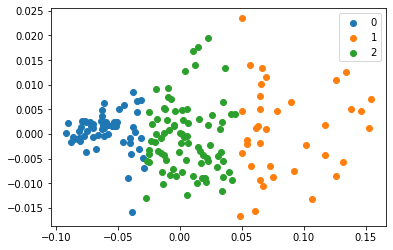

In [8]:
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(X_tranformed[label == i , 0] , X_tranformed[label == i , 1] , label = i)
plt.legend()
plt.show()

## K-Means from Scikit-learn

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(label.reshape(-1, 1))

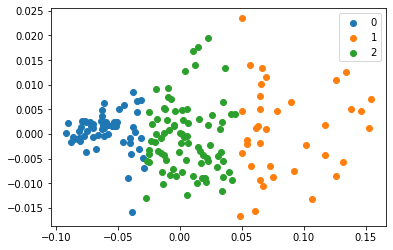

In [10]:
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(X_tranformed[label == i , 0] , X_tranformed[label == i , 1] , label = i)
plt.legend()
plt.show()